In [105]:
from scipy import interpolate
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from typhon.plots import profile_p, styles, profile_z
plt.style.use(styles.get('typhon'))

In [101]:
rs_data1 = xr.open_dataset("sounding_data/BCO_SoundingAscentProfile_DeeblesPointBarbadosWestIndies_20200120_1445.nc")
rs_data2 = xr.open_dataset("sounding_data/BCO_SoundingAscentProfile_DeeblesPointBarbadosWestIndies_20200120_1845.nc")

In [10]:
rs_data1["altitude"][0,:].values

array([2.49000e+01, 3.94000e+01, 4.10000e+01, ..., 2.60229e+04,
       2.60319e+04, 2.63541e+04], dtype=float32)

In [102]:
z_grid = np.arange(30, 20000, 10)
f1 = interpolate.interp1d(rs_data1["altitude"][0,:].values, rs_data1["windSpeed"][0,:].values)
f2 = interpolate.interp1d(rs_data2["altitude"][0,:].values, rs_data2["windSpeed"][0,:].values)

wind1 = f1(z_grid)
wind2 = f2(z_grid)
# xr.concat([rs_data1, rs_data2], dim="sounding")

/dev/shm/u237002/anaconda/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:688: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


In [103]:
def layer_mean(wind_regridded_list, z_in_m):
    """
    Returns mean over layer 250 m around given height 
    over given list of regridded wind profiles.
    """
    layer_mean_list = []
    for wind_regridded in wind_regridded_list:
        z_ind = np.where(z_grid == float(z_in_m))[0][0]
        layer_mean_list.append(np.mean(wind_regridded[z_ind-25:z_ind+25][0]))
    return np.round(np.mean(layer_mean_list), 1)

Text(0.5, 0, 'wind direction []')

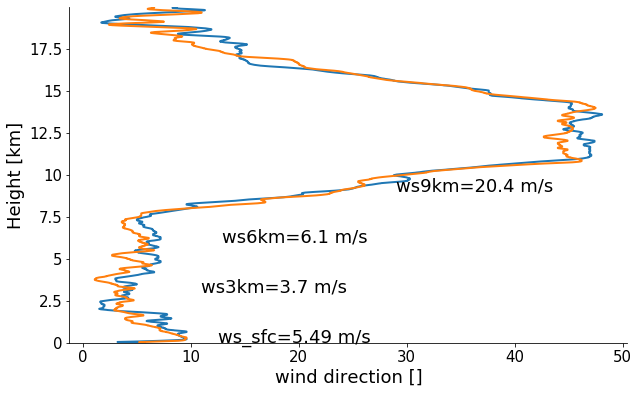

In [104]:
wind_list = [wind1, wind2]
plt.figure()
profile_z(z_grid,
          wind1)
profile_z(z_grid,
          wind2)
plt.text(wind1[0]+7, z_grid[0], f"ws_sfc={np.round(wind1[0], 2)} m/s")
plt.text(wind1[z_ind_3km]+7, z_grid[z_ind_3km], 
         f"ws3km={layer_mean([wind1, wind2], 3000.)} m/s")
plt.text(wind1[z_ind_6km]+7, z_grid[z_ind_6km], 
         f"ws6km={layer_mean([wind1, wind2], 6000.)} m/s")
plt.text(wind1[z_ind_9km]+7, z_grid[z_ind_9km], 
         f"ws9km={layer_mean([wind1, wind2], 9000.)} m/s")
plt.xlabel("wind direction []")
# plt.savefig("windspeed_sounding_profile.pdf")

In [90]:
ship_met_data

,Start_UTC,Lat_Deg,Lon_Deg,BaroP_mb,AirTemp_DegC,RH_%,RainRate_mm/hour,Insolation_watt/m2,WindDir_Deg,WindSp_m/s,...,AerosolAbsorbGreen_Mm-1,RelWindDir_Deg,RelWindSpd_m/s,radon_mBq/m3,Ozone_ppb,ShipSpeed_knts,ShipGyro_Deg,SST_DegC,Salinity_psu,Fluorometer_volts
0,39600,14.349935,-53.004550,1014.50836,25.700000,65.858330,0.0,94.458290,65.629540,9.046474,...,0.531667,-11.116667,9.086667,468.5625,28.374447,0.271667,77.261830,26.813534,35.355606,0.126333
1,39660,14.349893,-53.004536,1014.45330,25.706667,66.480000,0.0,103.839890,64.683890,9.471170,...,0.625000,-10.483334,9.453333,468.5625,28.124205,0.255000,75.724830,26.817183,35.355164,0.126667
2,39720,14.349829,-53.004543,1014.46330,25.666668,63.978333,0.0,108.181526,62.713238,10.081670,...,-1.013333,-15.283334,10.061666,468.5625,28.978691,0.295000,78.663666,26.809616,35.354874,0.126333
3,39780,14.349785,-53.004494,1014.45166,25.600000,64.241670,0.0,113.144775,59.057716,10.130971,...,0.073333,-16.683332,10.105000,468.5625,28.801690,0.206667,76.000660,26.814367,35.354897,0.121167
4,39840,14.349746,-53.004498,1014.43000,25.600000,64.265000,0.0,115.302010,60.142838,10.493478,...,-0.201667,-16.133333,10.495000,468.5625,28.309338,0.323333,76.884834,26.816250,35.354538,0.121333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,46500,14.354829,-53.007840,1015.87836,25.823332,62.466667,0.0,682.067750,72.113040,9.088687,...,-0.241667,-5.350000,9.115000,443.5725,28.638922,0.165000,77.799670,26.833166,35.358560,0.095833
56,46560,14.354786,-53.007843,1015.91000,25.900000,63.258330,0.0,688.307740,70.404015,8.747607,...,0.201667,-5.183333,8.755000,443.5725,29.153664,0.196667,76.112170,26.833633,35.358566,0.093000
57,46620,14.354748,-53.007828,1015.93665,25.900000,63.515000,0.0,684.218600,75.187780,8.388226,...,0.108333,-2.966667,8.400000,443.5725,28.262545,0.243333,78.845170,26.834284,35.358494,0.093000
58,46680,14.354680,-53.007805,1015.93335,25.901667,62.553333,0.0,686.746600,84.241570,8.340721,...,-0.141667,7.683333,8.376667,443.5725,28.789480,0.235000,77.155830,26.834433,35.358730,0.089833


26.82316985

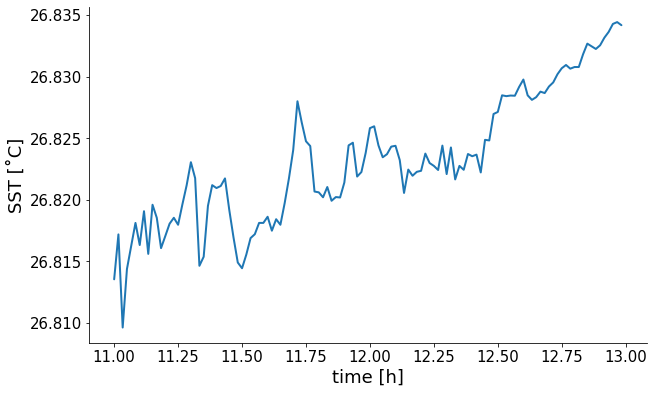

In [93]:
ship_met_data = pd.read_csv(f"ron_brown_met_data/Underway1min_RHB_2020012011_R0_V12.ict.txt", 
                            header=0, delimiter=" ")
for hh_range in range(12, 13):
    ship_met_data = ship_met_data.append(pd.read_csv(f"ron_brown_met_data/Underway1min_RHB_20200120{hh_range}_R0_V{hh_range+1}.ict.txt", 
                                header=0, delimiter=" "))
    
ship_met_data["WindSp_m/s"]
plt.plot(ship_met_data["Start_UTC"] / 3600., ship_met_data["SST_DegC"])
plt.ylabel("SST [˚C]")
plt.xlabel("time [h]")
np.mean(ship_met_data["SST_DegC"])
#plt.savefig("ron_brown_SST_timeseries.pdf")˚˚˚∆

In [45]:
bco_met_data

<xarray.Dataset>
Dimensions:     (time: 8640)
Coordinates:
  * time        (time) datetime64[ns] 2020-01-19 ... 2020-01-19T23:59:50
Data variables:
    bco_day     (time) datetime64[ns] ...
    YYYYMMDDHH  (time) float64 ...
    lat         float32 ...
    lon         float32 ...
    SDQ         (time) float32 ...
    DL          (time) float32 ...
    DIR         (time) float32 ...
    DR          (time) float32 ...
    MNV         (time) float32 ...
    VEL         (time) float32 ...
    MXV         (time) float32 ...
    T           (time) float32 ...
    TI          (time) float32 ...
    RH          (time) float32 ...
    P           (time) float32 ...
    R           (time) float32 ...
    RDS         (time) float32 ...
    RDH         (time) float32 ...
    RI          (time) float32 ...
    MXRI        (time) float32 ...
    RP          (time) float32 ...
    H           (time) float32 ...
    HDS         (time) float32 ...
    HDH         (time) float32 ...
    HI          (ti

In [95]:
bco_met_data = xr.open_dataset("Meteorology__Deebles_Point__2m_10s__20200120.nc")
noon_data = bco_met_data.sel(time=slice("2020-01-20T11:00:00", "2020-01-20T13:00:00"))
np.mean(noon_data["VEL"].values)

5.614591

In [96]:
bco_met_data

<xarray.Dataset>
Dimensions:     (time: 8640)
Coordinates:
  * time        (time) datetime64[ns] 2020-01-20 ... 2020-01-20T23:59:50
Data variables:
    bco_day     (time) datetime64[ns] ...
    YYYYMMDDHH  (time) float64 ...
    lat         float32 ...
    lon         float32 ...
    SDQ         (time) float32 ...
    DL          (time) float32 ...
    DIR         (time) float32 ...
    DR          (time) float32 ...
    MNV         (time) float32 ...
    VEL         (time) float32 ...
    MXV         (time) float32 ...
    T           (time) float32 ...
    TI          (time) float32 ...
    RH          (time) float32 ...
    P           (time) float32 ...
    R           (time) float32 ...
    RDS         (time) float32 ...
    RDH         (time) float32 ...
    RI          (time) float32 ...
    MXRI        (time) float32 ...
    RP          (time) float32 ...
    H           (time) float32 ...
    HDS         (time) float32 ...
    HDH         (time) float32 ...
    HI          (ti

Text(0.5, 0, 'time [h]')

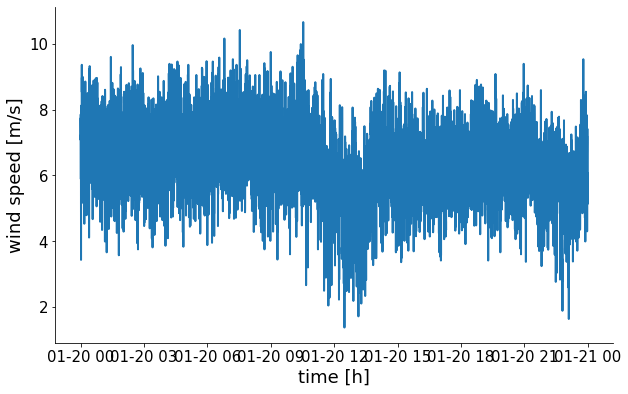

In [100]:
plt.plot(bco_met_data["time"], bco_met_data["VEL"])
plt.ylabel("wind speed [m/s]")
plt.xlabel("time [h]")